In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl
import seaborn as sns; sns.set()
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

# Tarea 3: Encuentre la regresión

Ud recibe unos datos $x$ y $y$ cómo se muestran a continuación. Ud debe responder cuatro preguntas a partir de estos datos. Suponga que ud tiene un modelo tal que $y=f(x)$ más aún desconoce $f$.

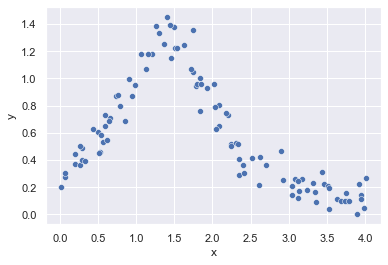

,x,y
0,0.065859,0.277413
1,0.020931,0.202239
2,0.070312,0.307369
3,0.206166,0.367530
4,0.286572,0.491144
...,...,...
95,3.922613,0.225565
96,3.898473,0.000000
97,3.952111,0.141005
98,3.939211,0.115500


In [2]:
df = pd.read_pickle('ex1.gz')
sns.scatterplot(x='x',y='y',data=df)
plt.show()
df

## (A) Pendiente e intercepto
Determine la pendiente de los datos en el intervalo $[0,1.5]$ y el valor del intercepto con el eje $y$. Es decir, $f(0)=?$. ¿Cuál es el valor de $r^2$?

El intercepto que se calculo dio como resultado:  [0.93108183]
La pendiente del ejercicio es:  [[-0.17520935]]
El rValue para este ejercicio es de:  0.2789267821543092


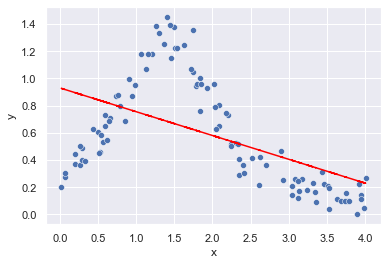

In [10]:
a = df[(df.x >= 0) & (df.x <= 1.5)]
x= df['x'].values.reshape(-1,1)
y= df['y'].values.reshape(-1,1)

Regresion = LinearRegression()
Regresion.fit(x,y)
Intercepto = Regresion.intercept_
Pendiente = Regresion.coef_
r2 = Regresion.score(x,y)

print("El intercepto que se calculo dio como resultado: ", Intercepto)
print("La pendiente del ejercicio es: ", Pendiente)
print("El rValue para este ejercicio es de: ", r2)

#Grafica De La pendiente, y el intercepto

f=Pendiente*x+Intercepto
sns.scatterplot(x='x',y='y',data=df)
plt.plot(x,f,"red")

## (B) Regresión polinomial
Suponga que quiere realizar la siguiente regresión polinomial,
$$y=\beta_1+\beta_2x+\beta_2x^2+\beta_2x^3+\beta_2x^4+\beta_2x^5.$$
Plantee la función de costo que le permita calcular los coeficientes y calcule $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. ¿Cuál es el $r^2$?

Calcule $f(0)$ y compare con los resultados anteriores

In [11]:
def funcion(p,x):
    return p[0]+p[1]*x+p[2]*(x**2)+p[3]*(x**3)+p[4]*(x**4)+p[5]*(x**5)

In [12]:
def L(p,x,y):
    d=f(p,x) - y
    return np.dot(d,d)/len(y)

In [13]:
Rp= sp.optimize.minimize(fun=Lfit, x0=np.array([1,0,0,0,0,0]), args = (x,y), method='L-BFGS-B', tol=1e-8)
print("El valor de Beta,Beta1,Beta2,Beta3,Beta4,Beta5 es:" , op['x'])
print ("EL valor de la funcion f(0) es de:", Rp['x'][0])


NameError: name 'Lfit' is not defined

In [14]:
FX = df["y"]
b = np.linspace(0,4,100)
Z = funcion(Rp['x'][5],Rp['x'][4],Rp['x'][3],Rp['x'][2],Rp['x'][1],Rp['x'][0],b)
r2 = 1-np.sum((Z-FX)**2)/np.sum((y-y.mean())**2)

NameError: name 'Rp' is not defined

## (C) Regresión polinomial exacta
Resulta, que cuando se quiere hacer alguna regresión polinomial esta se puede hacer de forma exacta. ¿Cómo? Suponga que ud va a considerar que su problema en lugar de tener $1$ variable ($x$) tiene $n+1$, siendo $n$ el orden del polinomio a ajustar. Es decir, sus nuevas variables van a ser $\{x_0,\,x_1,\,x_2,\,x_3,\dots,\,x_n\}$ definiendo $x_j=x^j$. Así pues, siguiendo el mismo procedimiento para la regresión lineal multidimensional que realizamos para el ejercicio de datos inmobiliarios, puede encontrar los valores de los coeficientes $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. Encuentre estos valores y compare con los resultados en la sección **(B)**.

Calcule $f(0)$ y compare con los resultados anteriores.

> Si ud se pregunta si esto es posible la respuesta es sí. Inclusive, esto se puede extender a cualquier a cualquier conjunto de funciones, tal que $x_j=f_j(x)$, que represente un conjunto "linealmente independiente" (¡Me estoy adelantando a *Fourier*!). Para quienes quieran explorar algunas curiosidades matemáticas, cuando $n+1$ es igual al número de puntos o valores de $x$ (y todos diferentes) la matriz es siempre invertible y resulta ser la inversa de una matriz de Vandermonde.

In [3]:
Y = df.loc[:, ['y']]

Y

,y
0,0.277413
1,0.202239
2,0.307369
3,0.367530
4,0.491144
...,...
95,0.225565
96,0.000000
97,0.141005
98,0.115500


In [45]:
X = df.loc[:, ['x']].rename(columns={'x': 'x1'})
X.insert(0, 'x0', 1)

X['x2'] = X['x1']*X['x1']
X['x3'] = X['x1']*X['x1']*X['x1']
X['x4'] = X['x1']*X['x1']*X['x1']*X['x1']
X['x5'] = X['x1']*X['x1']*X['x1']*X['x1']*X['x1']

def funcion(p,x):
    return p[0]+p[1]*x+p[2]*X['x2']+p[3]*X['x3']+p[4]*X['x4']+p[5]*X['x5']

def L(p,x,y):
    d=f(p,x) - y
    return np.dot(d,)/len(y)

print("\nRegresion Polinomial Exacta")
Rp = sp.optimize.minimize(fun=Lfit, x0=np.array([1,0,0,0,0,0]), args = (x,y), method='L-BFGS-B', tol=1e-8)
print("\n",Rp)
yf = funcion(Rp.x,x)


Regresion Polinomial Exacta


ValueError: shapes (38,1) and (38,1) not aligned: 1 (dim 1) != 38 (dim 0)

## (D) Regresión a un modelo teórico

Suponga que su modelo teórico es el siguiente:
$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$
Halle $a$, $b$, $c$ y $\gamma$.

Calcule $f(0)$ y compare con los resultados anteriores

In [46]:
def funcion(p,x):
    return parametros[0]/((((x-p[1])**2)+p[2])**p[3])

def L(p,x,y):
    d=funcion(p,x) - y
    return np.dot(d,d)/len(y)


print("\nRegresion a Modelo Teorico")
Rp = sp.optimize.minimize(fun=Lfit, x0=np.array([0,0,0,0]), args = (x,y), method='L-BFGS-B', tol=1e-8)
print(Rp)

yf= funcion(Rp.x,x)
print("El valor de cada parametro es decir de a,b,c y omega, es", Rp['x'])


Regresion a Modelo Teorico


IndexError: index 4 is out of bounds for axis 0 with size 4